# <center>Income Range Prediction - EDA + ML Classification</center>

<hr style="border: none; border-top: 1px solid #000;">

<center>
    <span>
        Created by <b>Ian Yap</b>
        &emsp;|&emsp;
        Data from <a href="https://www.kaggle.com/datasets/lodetomasi1995/income-classification"><b>Kaggle</b></a>
        &nbsp;
    </span>
</center>

<br>

<center>
    <span>
        <a href="https://www.linkedin.com/in/ian-yap-052870139/"><b>LinkedIn</b></a>
        &emsp;|&emsp;
        <a href="https://xiyap.github.io/"><b>Portfolio</b></a>
    </span>
</center>
    
<hr style="border: none; border-top: 1px solid #000;">


## Table of Contents

1. [Background](#Background)
2. [Objectives](#Objectives)
3. [Feature Information](#Feature_Information)
4. [Import Libraries](#Import_Libraries)
5. [Data Loading](#Data_Loading)
6. [Feature Engineering](#Feature_Engineering)
7. [Exploratory Data Analysis (EDA) & Visualization](#Exploratory_Data_Analysis_(EDA)_&_Visualization)
    - [Feature Data Analysis](#Feature_Data_Analysis)
    - [Feature Relationship Analysis](#Feature_Relationship_Analysis)
    - [Data Correlation](#Data_Correlation)
8. [Data Preparation](#Data_Preparation)
9. [Model Development](#Model_Development)
    - [Logistic Regression with GridSearch (grid_log)](#Logistic_Regression_with_GridSearch_(grid_log))
    - [KNN with GridSearch (grid_knn)](#KNN_with_GridSearch_(grid_knn))
    - [Random Forest Classifier with GridSearch (grid_rfc)](#Random_Forest_Classifier_with_GridSearch_(grid_rfc))
    - [SVC with GridSearch (grid_svc) & LinearSVC with GridSearch (grid_lsvc)](#SVC_with_GridSearch_(grid_svc)_&_LinearSVC_with_GridSearch_(grid_lsvc))
    - [AdaBoost with GridSearch (grid_ab)](#AdaBoost_with_GridSearch_(grid_ab))
    - [Extreme Gradient Boost with GridSearch (grid_xgb)](#Extreme_Gradient_Boost_with_GridSearch_(grid_xgb))
    - [Gaussian NB (gnb)](#Gaussian_NB_(gnb))
10. [Model Comparison](#Model_Comparison)
11. [Conclusion](#Conclusion)
12. [Recommendation](#Recommendation)
13. [Final Model Deployment](#Final_Model_Deployment)

## <a id='Background' href=#1> Background </a>

Companies across a wide variety of industries often conduct research or seek info on the financial status of an individual, especially whether an individuals' annual income surpasses \\$50,000. One of the many reasons this info is important is due to the rising trend of targeted advertising and marketing. Companies selling products or providing services would want to identify higher income individuals to be targeted with advertisements of high-end products or services, as advertisements targeted to the wrong demographic will incur a loss and reduced profits.

Besides product marketing, financial institutions could promote investment strategies based on ones annual income. Banks may also use this info to determine credit risk of an individual during loan application. Furthermore, governments can use this income prediction to determine individuals who are eligible for welfare assistance. As you can see, income predictions can be used in many ways to the benefit of companies or individuals. Hence, it is important to have a model which can accurately predict the annual income range.

In this project, a dataset containing information about the basic details of an individual such as age, sex, race, education, marital status and native country will be used. The dataset also contains information regarding to ones job such as their occupation and working hours per week along with their capital gains or losses. Based on this dataset, a classification model will be developed to accurately predict if the annual income of an individual is above or below \\$50K.

Moreover, the data obtained can also be helpful in gaining insight on the characteristic an individual needs in order to have a higher chance of earning more than \\$50K per year. Details regarding the kind of jobs that typically provides a higher annual income can also determined. This insight can be used to guide any individual in the right direction towards improving ones social status.

## <a id='Objectives' href=#1> Objectives </a>

The *main* objective of this project is to **develop a classification model which can predict if the annual income of an individual is above or below \\$50K.**

The *secondary* objectives of this project are:
1. To determine the **key characteristics which differentiates an individual earning above and below \\$50K annually.**
2. To identify the **types of jobs with a higher annual income.**

## <a id='Feature_Information' href=#1> Feature Information </a>

- **age**: Age of individual
- **workclass**: Working status of individual
- **fnlwgt**: Final weight (number of people the entry represents)
- **education**: Education level of individual
- **education-num**: Education level in numerical form
- **marital-status**: Marital status of individual
- **occupation**: Job of an individual
- **relationship**: Represents who the individual is relative to others
- **race**: Race of individual
- **sex**: Gender of individual
- **capital-gain**: Increase in capital asset of individual
- **capital-loss**: Decrease in capital asset of individual
- **hours-per-week**: Working hours per week of individual
- **native-country**: Country of origin of individual
- **income**: Does the individual make more or less than $50,000 annually

## <a id='Import_Libraries' href=#1> Import Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## <a id='Data_Loading' href=#1> Data Loading </a>

Load the dataset to be used for analysis and model development.

In [2]:
df_ori = pd.read_csv('income analysis.csv')
df = df_ori.copy()

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

## <a id='Feature_Engineering' href=#1> Feature Engineering </a>

Perform data wrangling to clean the dataset to be useable for the predictive model.

Fixing issue with column names containing spaces:

In [5]:
new_column = []
for i in df.columns:
    i = i.strip()
    new_column.append(i)

df.columns = new_column
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Check for duplicated data:

In [6]:
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 24


In [7]:
df.drop_duplicates(inplace = True)
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of duplicated rows: 0


Check the shape of the dataset and its status:

The dataset has 32537 rows, 15 columns, no missing data and the data types of each attributes are correct.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [9]:
missing_value = df.isna().sum()
missing_value_percentage = (missing_value / len(df)) * 100

pd.DataFrame({'Total Missing Value': missing_value, 'Missing Percentage': missing_value_percentage})

,Total Missing Value,Missing Percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


Remove unnecessary features:
- 'fnlwgt' is not useful as it is essentially duplicates of data.
- 'education-num' is 'education' as dummy variables. We will use 'education' for data visualization and convert it to dummy variables later on.

In [10]:
df = df.drop(['fnlwgt', 'education-num'], axis = 1)

Gain insights on the dataset by using descriptive statistics:

In [11]:
num_col = df.select_dtypes(include = 'number').describe()
num_col

,age,capital-gain,capital-loss,hours-per-week
count,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1078.443741,87.368227,40.440329
std,13.637984,7387.957424,403.101833,12.346889
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [12]:
cat_col = df.select_dtypes(include = 'object').describe()
cat_col

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [13]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column workclass:     
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']     

Unique values in column education:     
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']     

Unique values in column marital-status:     
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']     

Unique values in column occupation:     
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']     

Unique values in column relationship:     
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-r

The categorical data has leading whitespaces and '?' as its values. We will remove the whitespaces and replace '?' with 'Other'.

In [14]:
# Strips leading and trailing whitespaces if value is string
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Replaces '?' with 'Other'
df = df.replace('?', 'Other')

In [15]:
for col in cat_col:
    print(f'Unique values in column {col}: \
    \n{df[col].unique()} \
    \n')

Unique values in column workclass:     
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Other' 'Self-emp-inc' 'Without-pay' 'Never-worked']     

Unique values in column education:     
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']     

Unique values in column marital-status:     
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']     

Unique values in column occupation:     
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']     

Unique values in column relationship:     
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']     

Unique values in column race: 

## <a id='Exploratory_Data_Analysis_(EDA)_&_Visualization' href=#1> Exploratory Data Analysis (EDA) & Visualization </a>

In this section we will explore and gain insights to the data through visualization.

### <a id='Feature_Data_Analysis' href=#1> Feature Data Analysis </a>

First, we explore the features in the dataset.

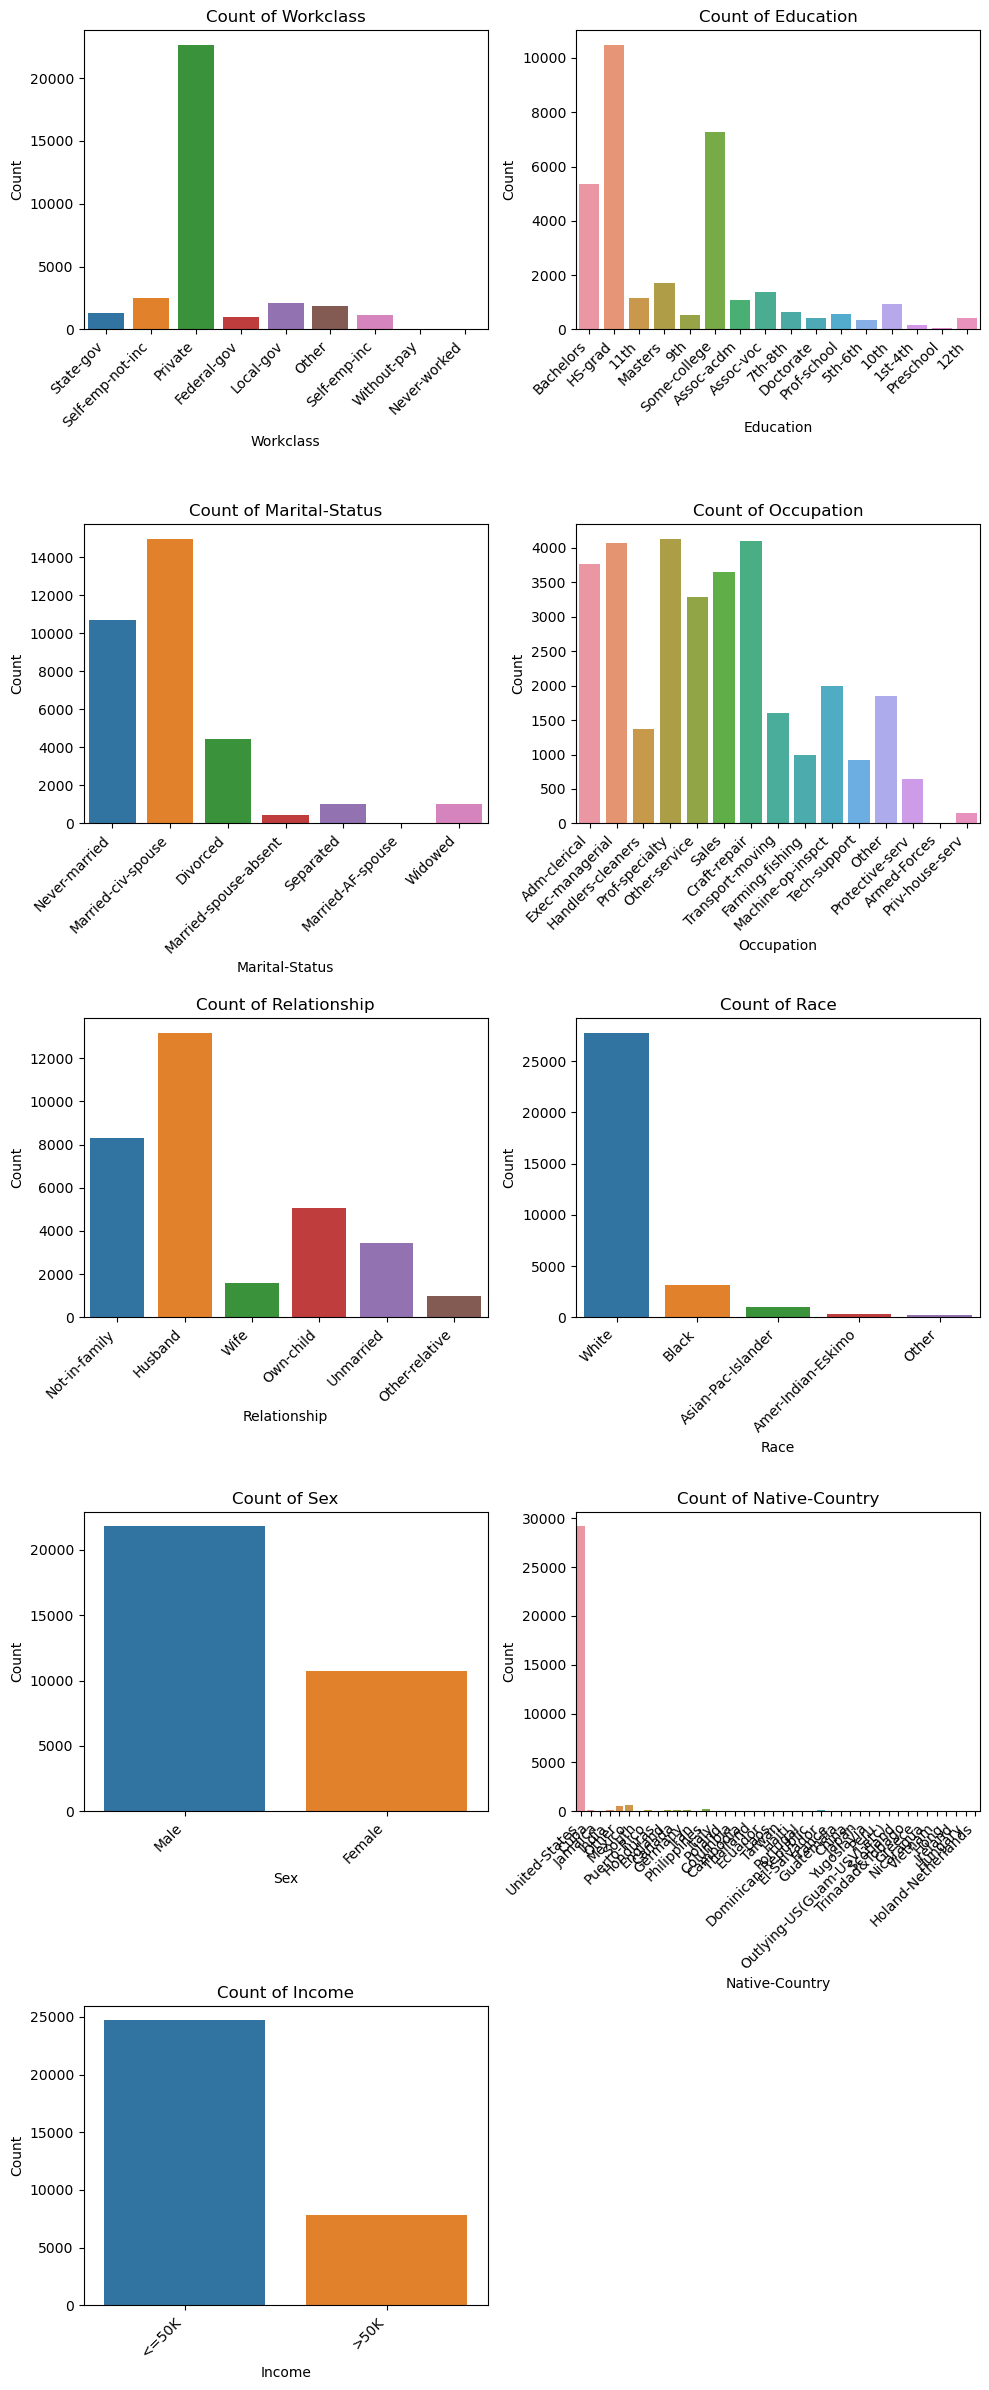

In [16]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (10, 8*3))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1), 
           (2, 0), (2, 1), 
           (3, 0), (3, 1),
           (4, 0), (4, 1)]

for i, cat_col_name in enumerate(cat_col.columns):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax)
    ax.set_title(f'Count of {cat_col_name.title()}')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
fig.delaxes(axes[4, 1])
plt.tight_layout()
plt.show()

By plotting count plots for the categorical features, we are able to visualize the distribution for each categorical feature.

Observation:
- Most people **work in the private sector.**
- Most of the data are from individuals whose highest education is high school graduate, followed by college and bachelors degree.
- For married couples, this **data represents more on the husband rather than wife.**
- For the count of native countries, due to the extremely high amount for United States, the counts for other countries can be seen. Hence, we will look into this further.
- Around **25% of individuals have yearly income above $50k.**

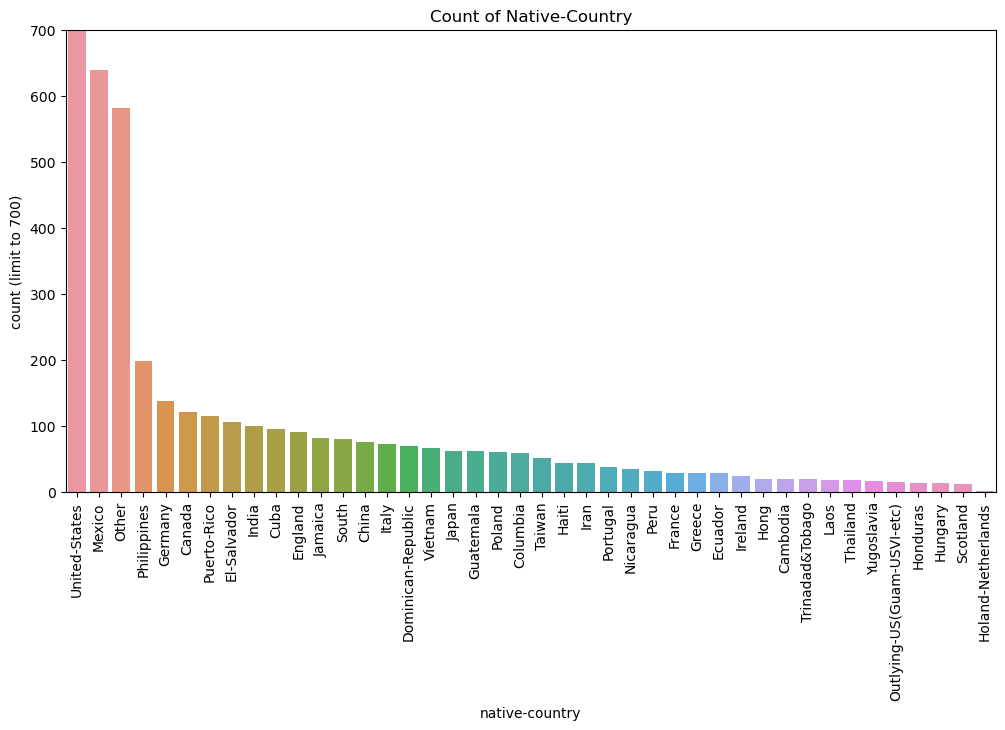

In [17]:
# Limit y-axis and sort country count

country_sorted = df['native-country'].value_counts().index

plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'native-country', order = country_sorted)
plt.title('Count of Native-Country')
plt.ylabel('count (limit to 700)')
plt.xticks(rotation = 90)
plt.ylim(0, 700)
plt.show();

The zoomed in count plot of native countries shows the count for the remainder countries sorted in decreasing order.

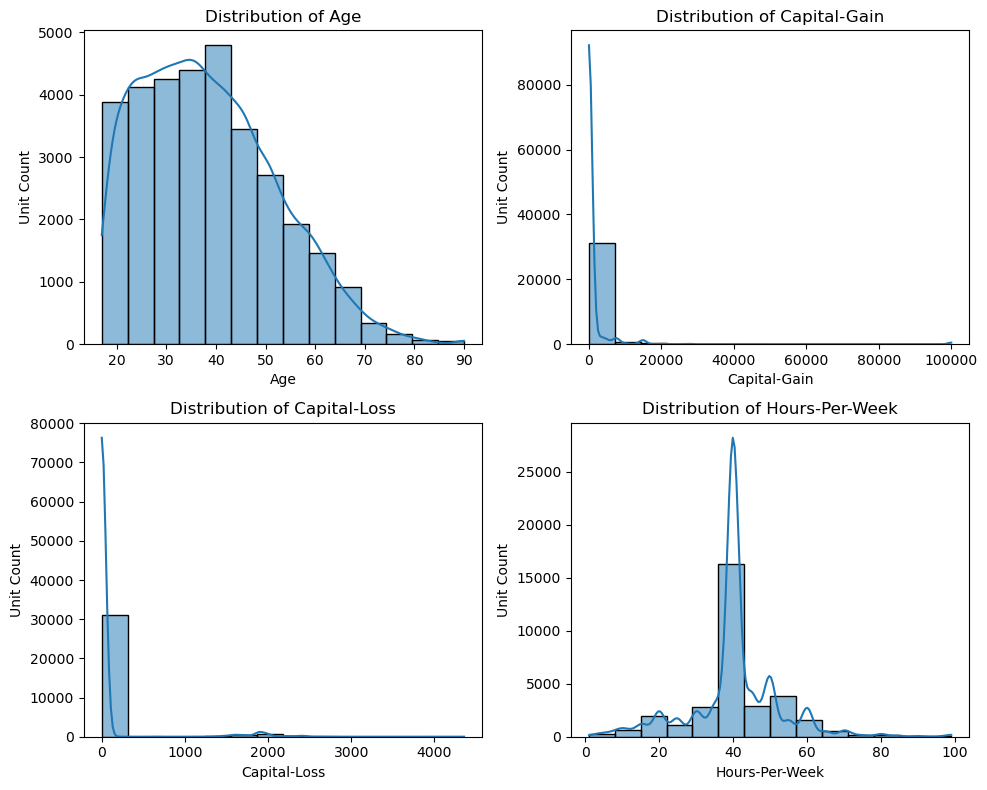

In [18]:
# Histogram for numerical features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
row_col = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, num_col_name in enumerate(num_col):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.histplot(data = df, x = num_col_name, kde = True, ax = ax, bins = 14)
    ax.set_title(f'Distribution of {num_col_name.title()}')
    ax.set_xlabel(num_col_name.title())
    ax.set_ylabel('Unit Count')

# fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

By plotting a histograms for the numerical features, we can visualize the distribution for each discrete and continuous feature.

Observation:
- The **number of workers increases gradually from age range of 20 to 40 years old.** It decreases sharply after that.
- **Most people work around 40 hours per week**, which is the standard maximum limit for weekly working hours in the United States.

### <a id='Feature_Relationship_Analysis' href=#1> Feature Relationship Analysis </a>

Next, we analyse the relationships between the features.

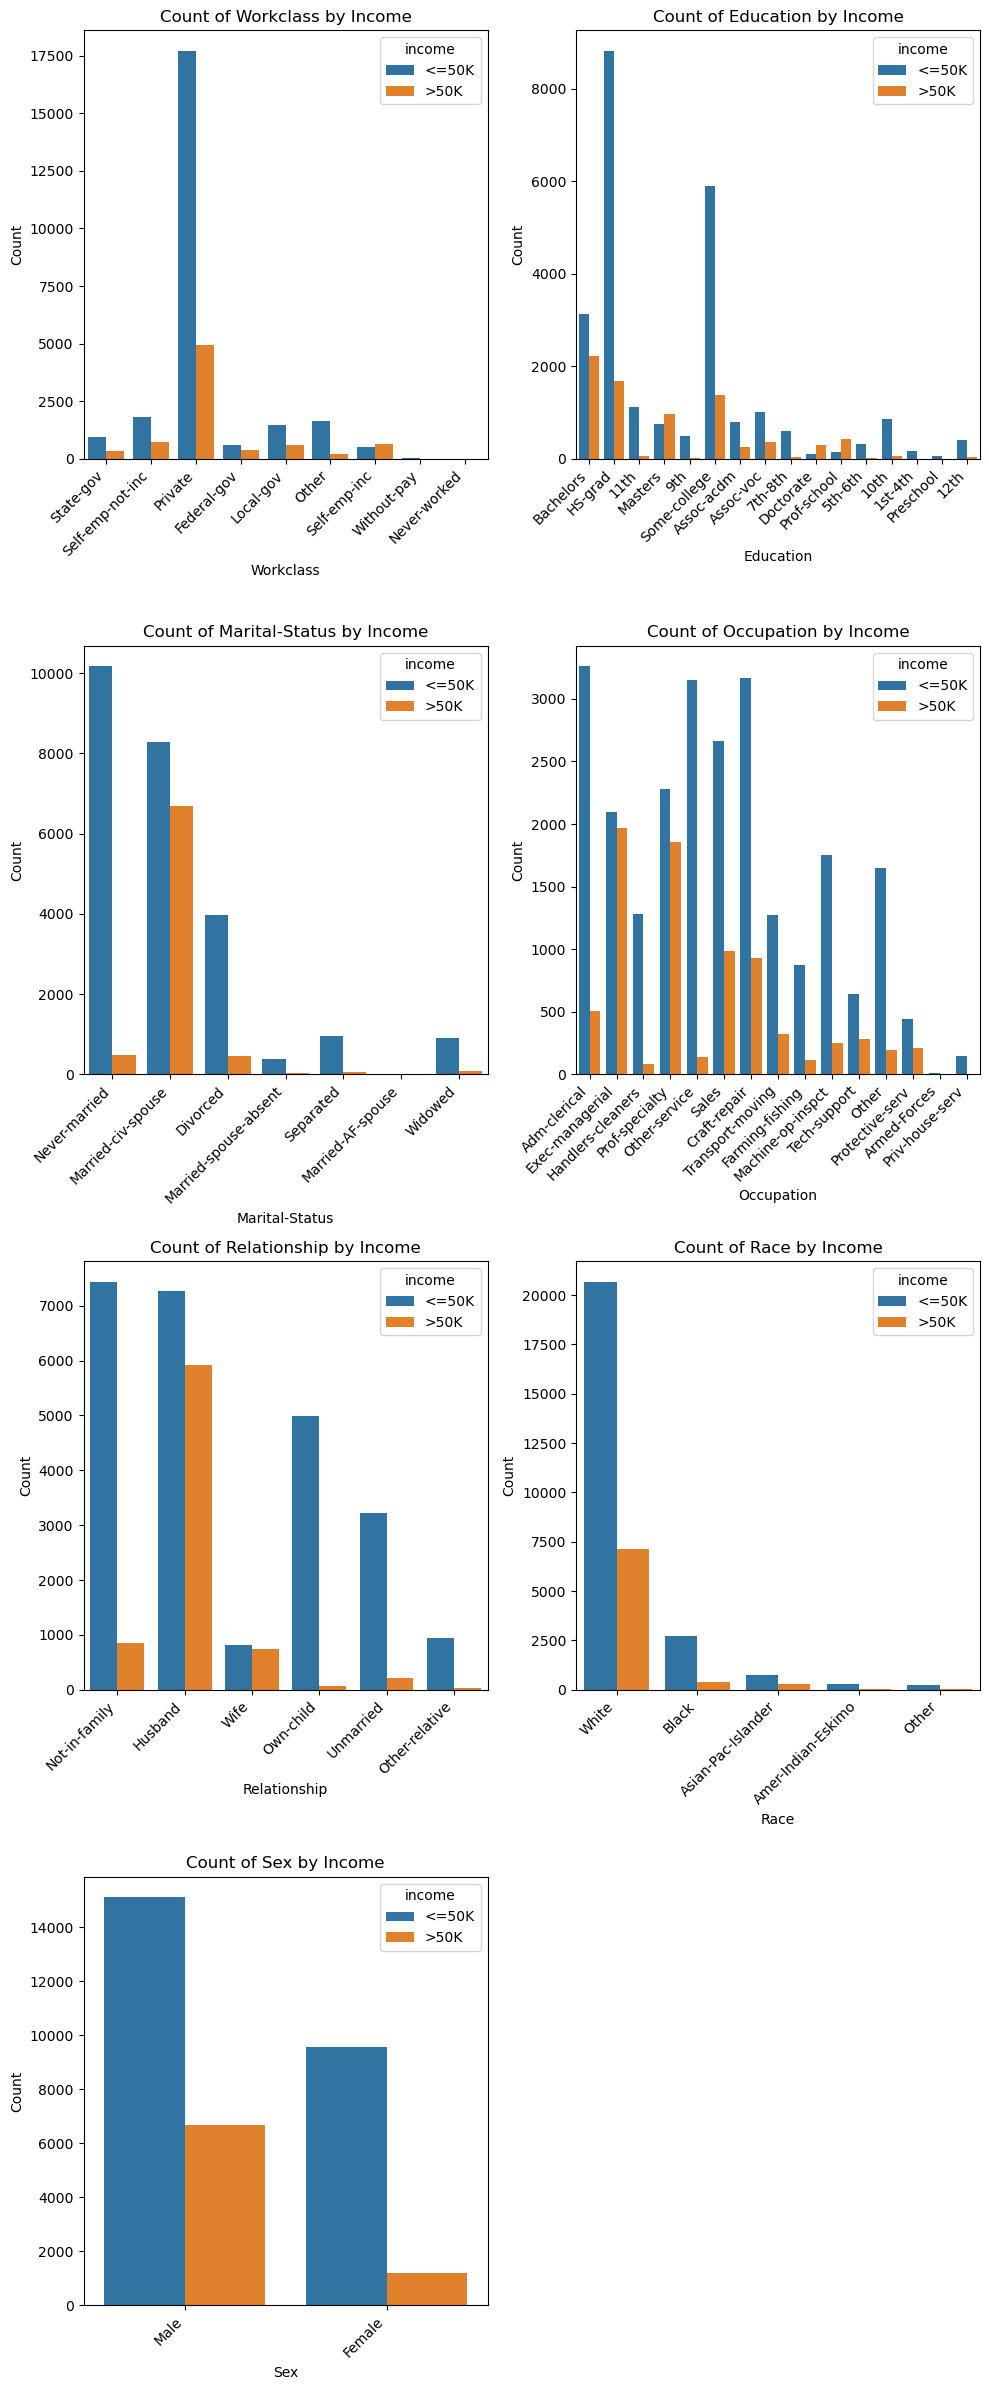

In [19]:
# Count plot for categorical features
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 8*3))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1), 
           (2, 0), (2, 1), 
           (3, 0), (3, 1)]

for i, cat_col_name in enumerate(cat_col.columns[0:7]):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.countplot(data = df, x = cat_col_name, ax = ax, hue = 'income')
    ax.set_title(f'Count of {cat_col_name.title()} by Income')
    ax.set_xlabel(cat_col_name.title())
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()

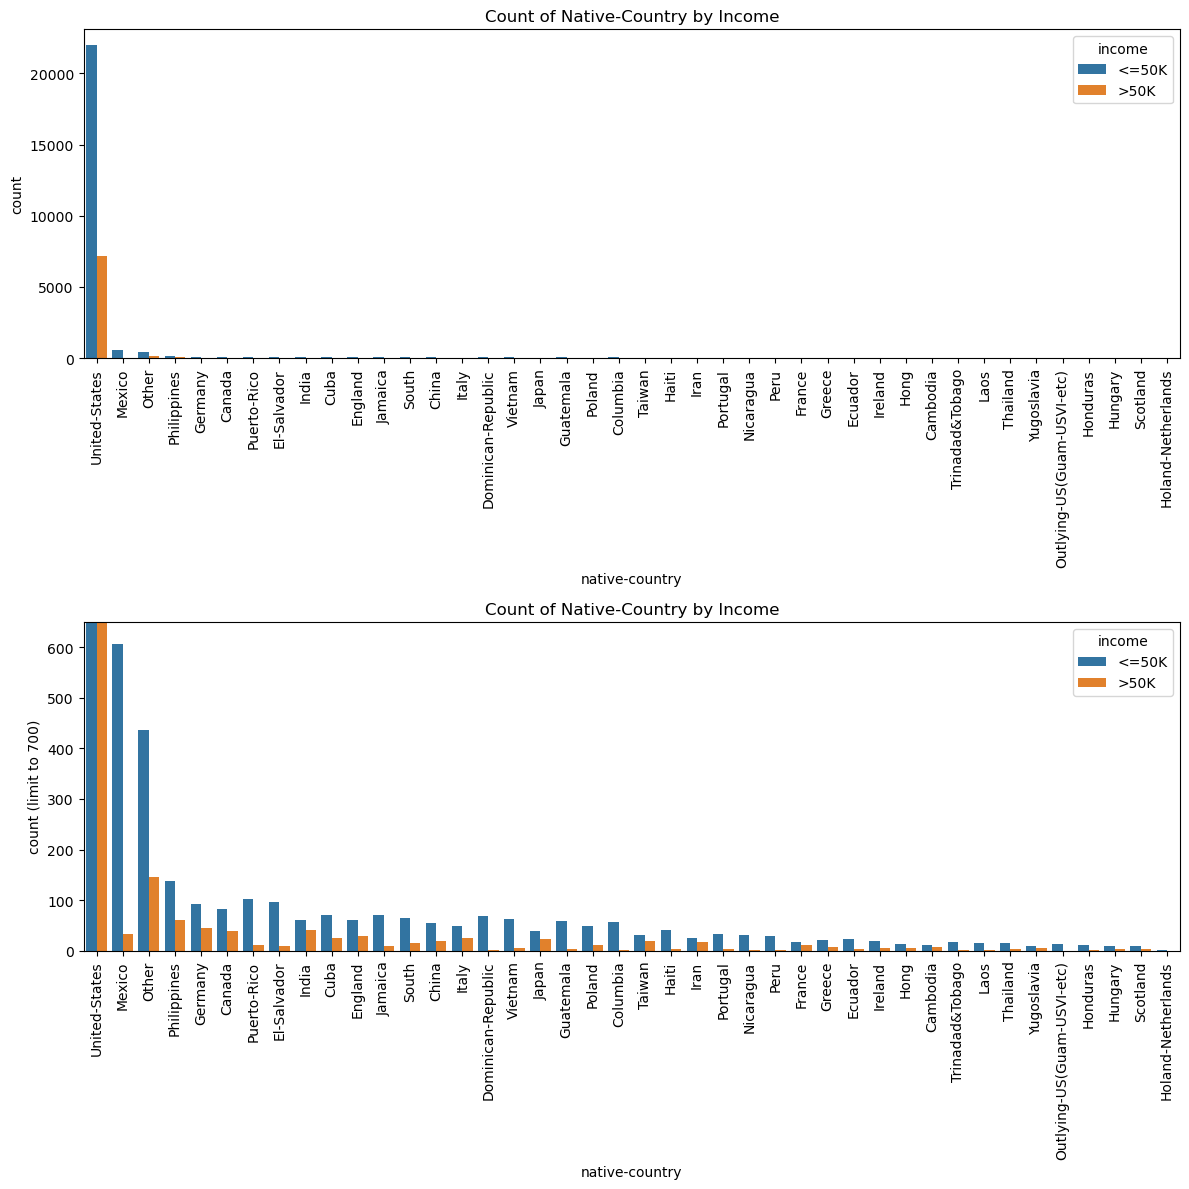

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 12))
ax0 = axes[0]
ax1 = axes[1]

sns.countplot(data = df, x = 'native-country', order = country_sorted, hue = 'income', ax = ax0)
ax0.set_title('Count of Native-Country by Income')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 90)

sns.countplot(data = df, x = 'native-country', order = country_sorted, hue = 'income')
ax1.set_title('Count of Native-Country by Income')
ax1.set_ylabel('count (limit to 700)')
ax1.set_xticklabels(ax0.get_xticklabels(), rotation = 90)
ax1.set_ylim(0, 650)

plt.tight_layout()
plt.show()

By plotting count plots of categorical features with respect to income, we can visualize the relationship between the 'income' against all feature attributes.

Observation:
- **More self employed individuals earn above \\$50k annually** rather than below. We will look into this with detail.
- **Individuals with higher education levels typically have a higher chance to earn above \\$50k**, as shown for Masters, Doctorate and Prof-School graduates. Meanwhile, around 40% of Bachelors Degree graduates have an income above \\$50k.
- **Married individuals typically have a higher ratio earning above \\$50k** compared to other individuals.
- Working at an **executive managerial or specialist position increases your chance of earning above \\$50k.**
- **Males have higher percentage earning above \\$50k** compared to females.

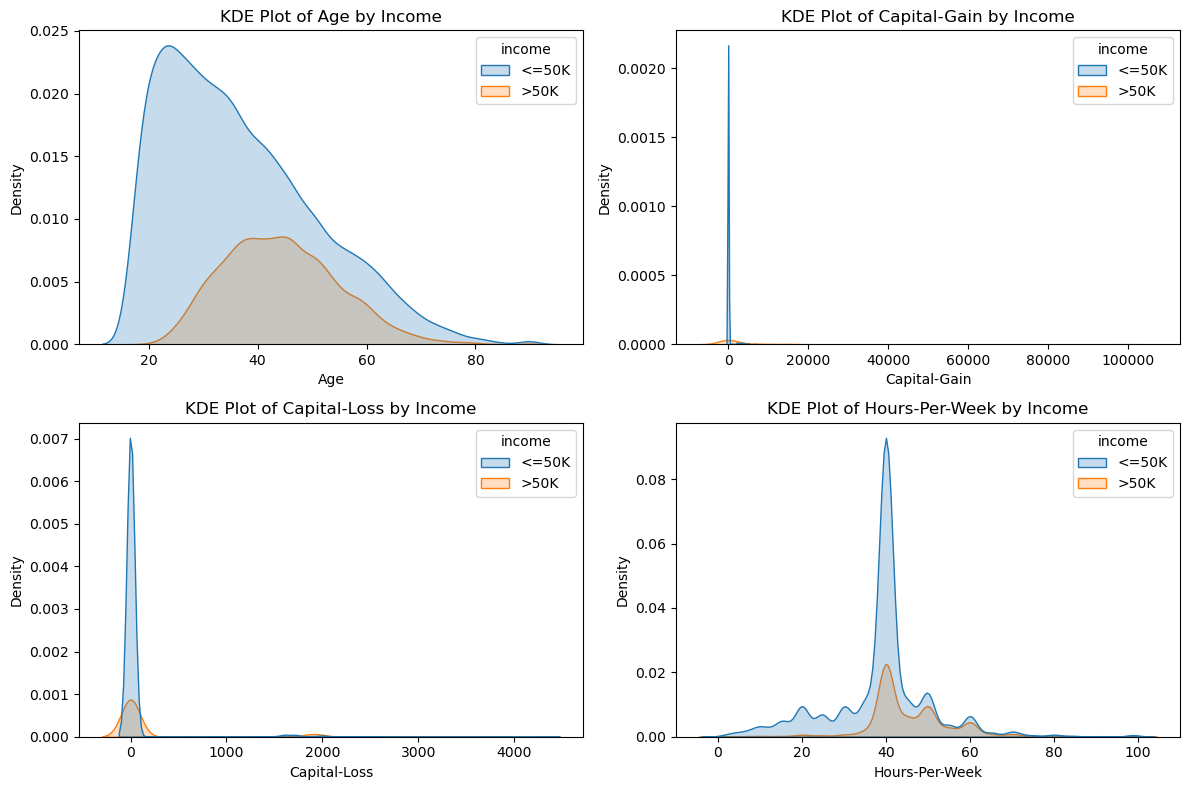

In [21]:
# KDE plot for continuous features
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
row_col = [(0, 0), (0, 1), 
           (1, 0), (1, 1)]

for i, cat_col_name in enumerate(num_col):
    row, col = row_col[i]
    ax = axes[row, col]
    
    sns.kdeplot(data = df, x = cat_col_name, ax = ax, fill = True, hue = 'income')
    ax.set_title(f'KDE Plot of {cat_col_name.title()} by Income')
    ax.set_xlabel(cat_col_name.title())
#     ax.set_ylabel('Count')
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
    
# fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

By plotting KDE plots for continuous features, we can visualize the probability distribution of continuous features.

Observations:
- The probability of earning above \\$50k is highest at the age range of around **40 years old.**

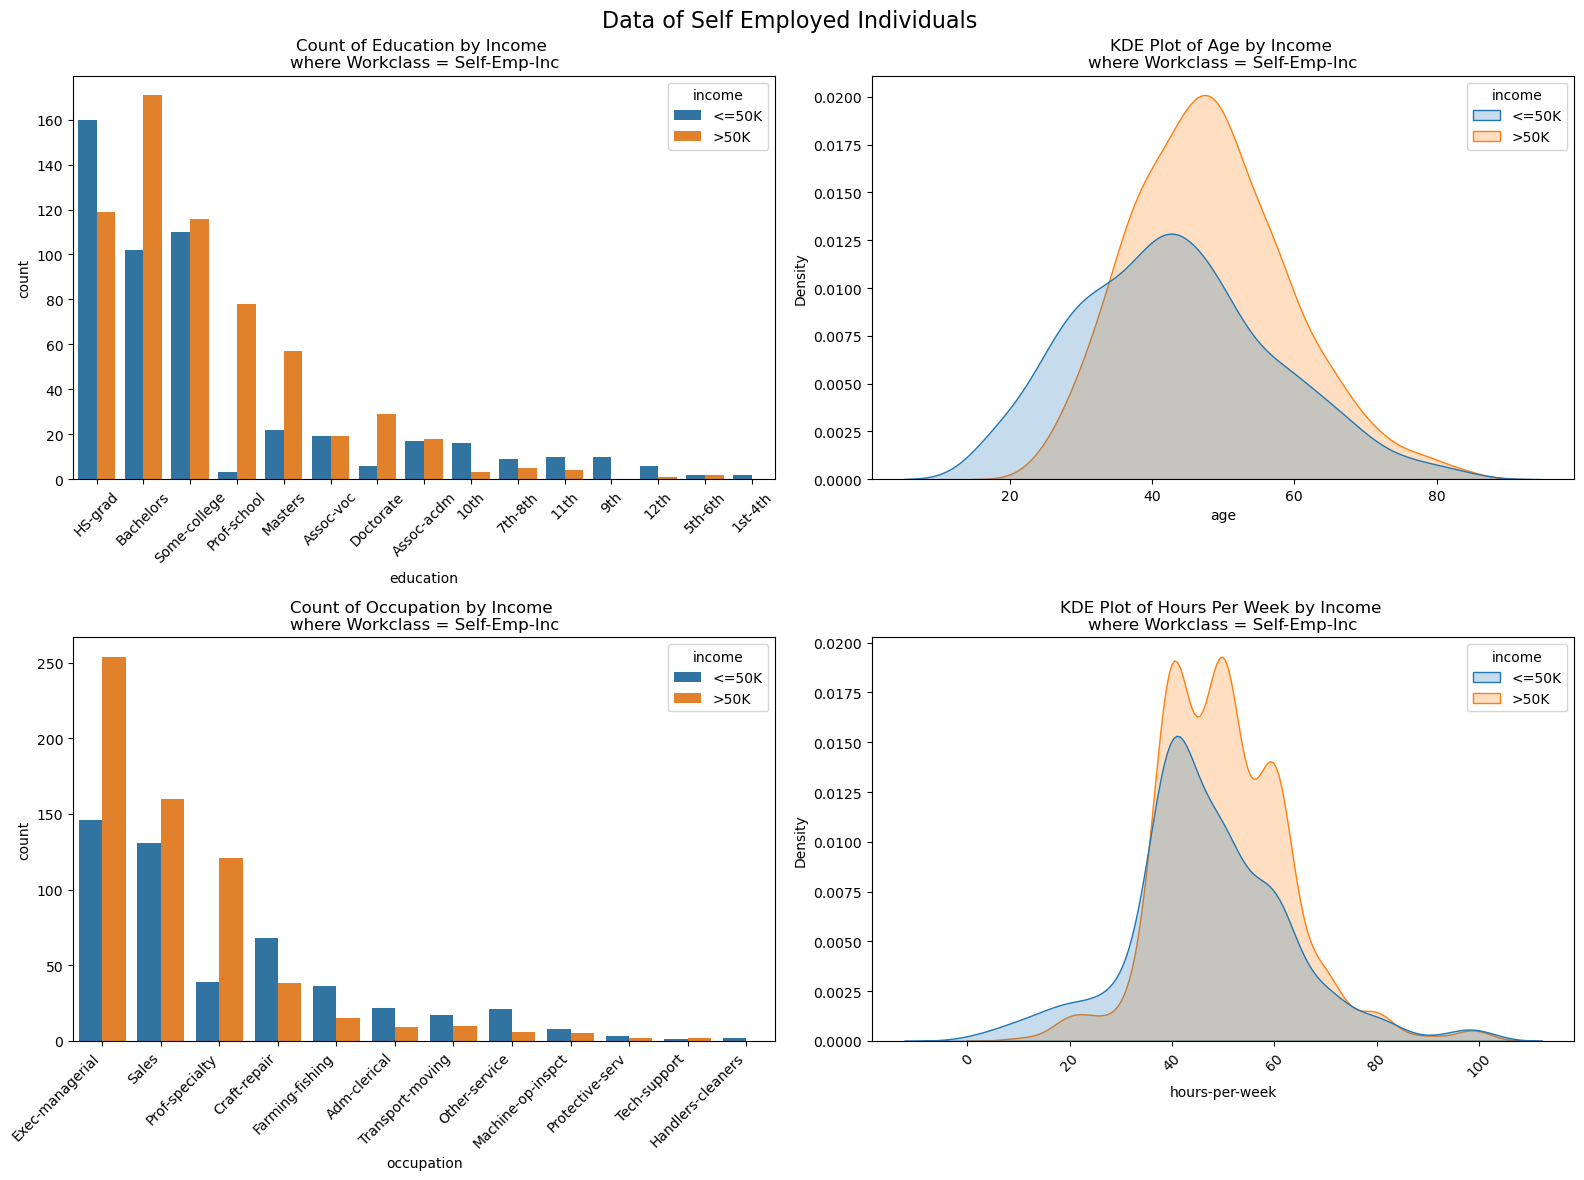

In [22]:
# self-emp-inc: education, age, occupation wrt income

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 12))
ax0 = axes[0, 0]
ax1 = axes[0, 1]
ax2 = axes[1, 0]
ax3 = axes[1, 1]

self_emp_inc = df[df['workclass'] == 'Self-emp-inc']

sns.countplot(data = self_emp_inc, x = 'education', order = self_emp_inc['education'].value_counts().index, hue = 'income', ax = ax0)
ax0.set_title('Count of Education by Income \nwhere Workclass = Self-Emp-Inc')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation = 45)

sns.kdeplot(data = self_emp_inc, x = 'age', hue = 'income', fill = True, ax = ax1)
ax1.set_title('KDE Plot of Age by Income \nwhere Workclass = Self-Emp-Inc')

sns.countplot(data = self_emp_inc, x = 'occupation', order = self_emp_inc['occupation'].value_counts().index, hue = 'income', ax = ax2)
ax2.set_title('Count of Occupation by Income \nwhere Workclass = Self-Emp-Inc')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha = 'right')

sns.kdeplot(data = self_emp_inc, x = 'hours-per-week', hue = 'income', fill = True, ax = ax3)
ax3.set_title('KDE Plot of Hours Per Week by Income \nwhere Workclass = Self-Emp-Inc')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 45)

plt.suptitle('Data of Self Employed Individuals', fontsize=16)
plt.tight_layout()
plt.show()

Subplots regarding details of self employed individuals are plotted to gain more insight on these higher earning individuals:

1. The count plot above is sorted in decreasing order. The plot shows that most **self employed** individuals are highschool graduates, followed closely by Bachelors Degree and college gradutes. However, the chances of earning above \\$50k self employed is higher if your **education level is higher than high school.**
2. The probability of earning above \\$50k self employed is highest around the **age of 40 - 50 years old**. This could be due to the plethora of experience gained through previous work.
3. Most self employed individuals earning above \\$50k are working in **executive or managerial positions, sales or as professionals or specialist.**
4. However, to be self employed and earning above \\$50k, there is a high probability that you will need to **work beyond 40 hours** as your earnings will be based on your hard work instead of a stable salary.

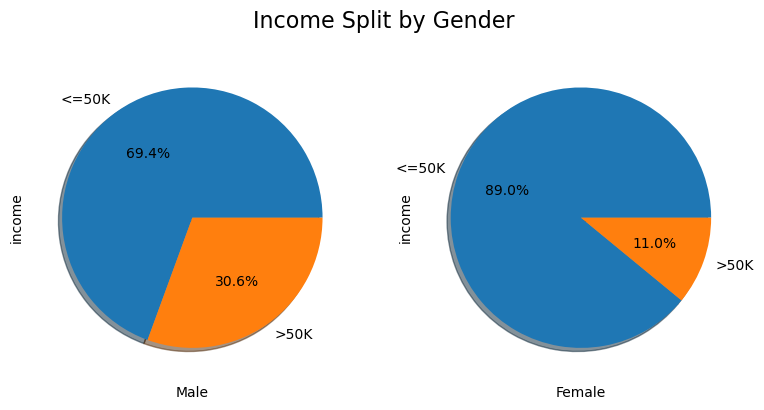

In [23]:
# percentage of income per sex

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ax0 = axes[0]
ax1 = axes[1]

df[df['sex'] == 'Male']['income'].value_counts().plot.pie(explode = [0,0], autopct = '%1.1f%%', shadow = True, ax = ax0)
ax0.set_xlabel('Male')

df[df['sex'] == 'Female']['income'].value_counts().plot.pie(explode = [0,0], autopct = '%1.1f%%', shadow = True, ax = ax1)
ax1.set_xlabel('Female')

plt.suptitle('Income Split by Gender', fontsize=16)
plt.tight_layout()
plt.show()

Based on the data, **30.6% of males** are able to obtain an annual income above \\$50k while only **11% of females** are able to achieve that.

### <a id='Data_Correlation' href=#1> Data Correlation </a>

In this section, we look at the correlation between the features and label.

In [24]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Convert the categorical features to dummy variables:

Labels:
- 0: <=50K
- 1: >50K

In [25]:
# For low feature count: map features with 2 unique values to 0 and 1 and get dummy
# For huge feature count: drop first column of dummies
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

# Categorical features of binary values to be mapped
df_dummy = df.copy()
df_dummy['income'] = label_enc.fit_transform(df_dummy['income'])
# df_dummy['income'] = df_dummy['income'].map({'<=50k': 0, '>50k': 1}) # To manually map labels according to preference

# Get dummies for remaining categorical features
df_dummy = pd.get_dummies(df_dummy)
df_dummy.head()

,age,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Other,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,2174,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Feature correlation to label
df_corr = df_dummy.corr()['income'].sort_values()[:-1]
pd.DataFrame(data = df_corr.values, index = df_corr.index, columns = ['Correlation to income'])

,Correlation to income
marital-status_Never-married,-0.318285
relationship_Own-child,-0.228593
sex_Female,-0.215969
relationship_Not-in-family,-0.188299
occupation_Other-service,-0.156332
...,...
capital-gain,0.223336
hours-per-week,0.229658
age,0.234037
relationship_Husband,0.400941


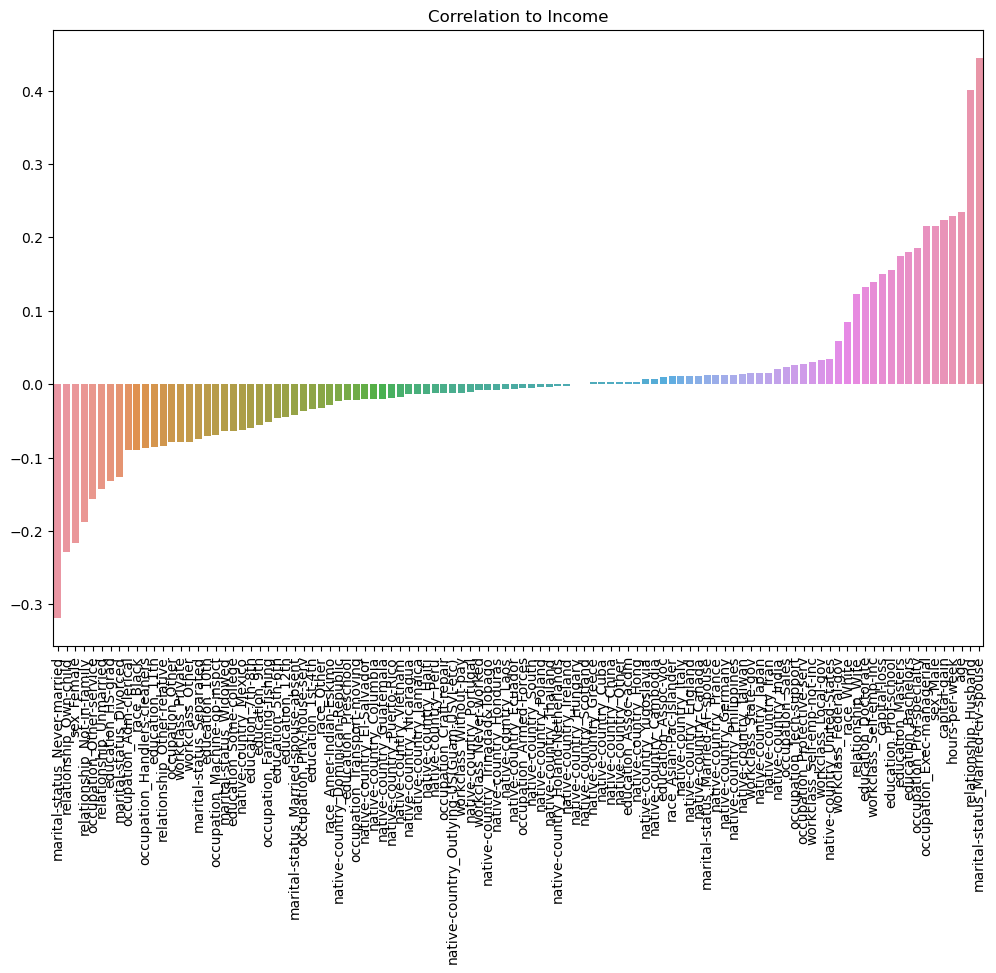

In [27]:
# Feature correlation to label
plt.figure(figsize = (12, 8))
sns.barplot(x = df_corr.index, y = df_corr.values)
plt.title('Correlation to Income')
plt.xticks(rotation = 90);

Due to the large amount of features with their dummies, the correlation heatmap is only plotted against the label 'income' for features with correlation above 0.1.

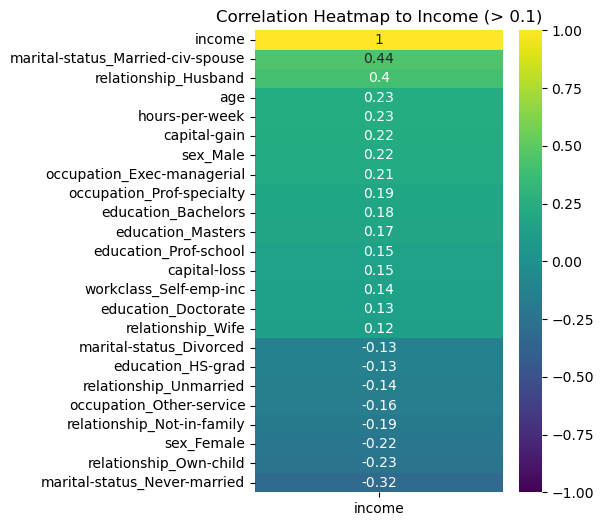

In [28]:
# Correlation between features and label
# Filter >= 0.1 (10%)
df_corr_income = df_dummy.corr()['income'].sort_values(ascending = False).to_frame()
df_corr_filter = df_corr_income[abs(df_dummy.corr()['income']) >= 0.1]

plt.figure(figsize = (4, 6))
sns.heatmap(data = df_corr_filter, cmap = 'viridis', vmin=-1, vmax=1, annot = True)
plt.title('Correlation Heatmap to Income (> 0.1)');

Observation:

1. More correlated to >50k
    - **Being married** actually has the highest correlation with having an annual income above \\$50k. This could be due to individuals proceeding with marriage only when they are financially stable. Besides that, most people who are married have worked a number of years. Therefore, their income would be higher than younger individuals who are not married.
    - **Husbands in marriage** have higher chance to be earning above \\$50k.
    - Individuals who are **older, work more hours per week, have capital gains, are males and working as an executive/managerial position** have a correlation between 0.2 - 0.3 to having an annual income above \\$50k.

2. More correlated to <=50k
    - Those who are **never married** are more likely to be earning below \\$50k.
    - Individuals who are **not in any relationship** are most likely earning below \\$50k.
    - **Females** are more correlated to earning below \\$50k as indicated in the pie chart of income split by genders.

## <a id='Data_Preparation' href=#1> Data Preparation </a>

In this section, we prepare the data and define some functions to be used for model development.

In [29]:
X = df_dummy.drop('income', axis = 1)
y = df['income']

In [30]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Split train-test once if using GridSearchCV, else split train-validation-holdout test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [31]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# Function to print classification report and confusion matrix
# [for XGB] optional_array_classes = np.array(['Label 0', 'Label 1'], dtype = object)
def model_report(model, prediction, *, optional_array_classes = None):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    
    if optional_array_classes is None:
        optional_array_classes = model.classes_
    else:
        pass
    
    print(classification_report(y_test, prediction))
    cm = confusion_matrix(y_test, prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = optional_array_classes)
    disp.plot()

In [33]:
# Function to create comparison DF of accuracy score and f1-score for different models
# model_lst = list of model names ['grid_log', 'grid_knn', 'grid_rfc', 'grid_svc', 'grid_gb', 'grid_ab', 'gnb']
# All y_test and all y_pred_(model_lst) variables must be defined
def error_compare_classification_binary(model_lst):
    from sklearn.metrics import accuracy_score, f1_score
    columns = ['Accuracy Score (higher better)', 'F1-Score [<=50K] (closer to 1 better)', 'F1-Score [>50K] (closer to 1 better)']
    data_lst = []

    for model in model_lst:
        temp_lst = []
        y_pred_func = globals()[f'y_pred_{model}']
        temp_lst.append(accuracy_score(y_test, y_pred_func))
        temp_lst.append(f1_score(y_test, y_pred_func, pos_label = '<=50K')) # pos_label = 0 & 1 for binary
        temp_lst.append(f1_score(y_test, y_pred_func, pos_label = '>50K'))
        data_lst.append(temp_lst)

    return pd.DataFrame(data = data_lst, index = model_lst, columns = columns)

## <a id='Model_Development' href=#1> Model Development </a>

The processed data is used to develop the model. Multiple machine learning algorithms are used while tuning the hyperparameters to ensure the best model is developed. The models will be evaluated against the objective of this project to determine the most suitable algorithm for this dataset.

### <a id='Logistic_Regression_with_GridSearch_(grid_log)' href=#1> Logistic Regression with GridSearch (grid_log) </a>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = LogisticRegression(max_iter = 5000)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid_log = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

grid_log = GridSearchCV(log, param_grid_log)
grid_log.fit(scaled_X_train, y_train)
grid_log.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l2'}

Ridge penalty (l2) which performs regularization to improve generalization of the model is deemed suitable for this dataset.

In [35]:
y_pred_grid_log = grid_log.predict(scaled_X_test)
grid_log.predict_proba(scaled_X_test)

array([[0.97354054, 0.02645946],
       [0.73553919, 0.26446081],
       [0.93428025, 0.06571975],
       ...,
       [0.99849956, 0.00150044],
       [0.3925163 , 0.6074837 ],
       [0.24077548, 0.75922452]])

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7428
        >50K       0.74      0.61      0.67      2334

    accuracy                           0.86      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.86      0.85      9762



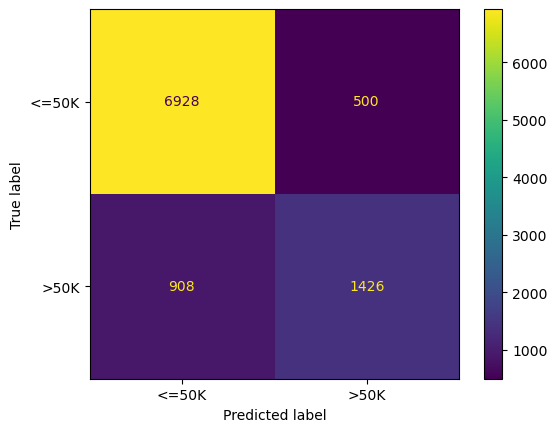

In [36]:
model_report(grid_log, y_pred_grid_log)

### <a id='KNN_with_GridSearch_(grid_knn)' href=#1> KNN with GridSearch (grid_knn) </a>

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
n_neighbors = list(range(1, 31))
param_grid_knn = {'n_neighbors': n_neighbors}

grid_knn = GridSearchCV(knn, param_grid_knn)
grid_knn.fit(scaled_X_train, y_train)
grid_knn.best_params_

{'n_neighbors': 21}

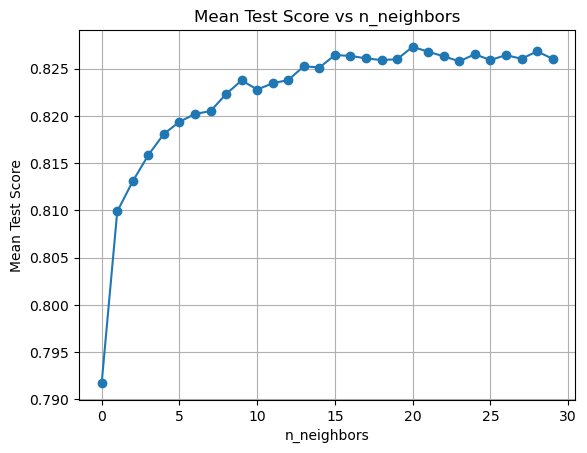

In [38]:
pd.DataFrame(grid_knn.cv_results_)['mean_test_score'].plot(marker = 'o')
plt.title('Mean Test Score vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show();

The n_neighbors (k) value with highest mean test score is k = 20. To avoid ties in classification, the next odd number of k = 21 is chosen for the KNN model.

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      7428
        >50K       0.70      0.56      0.62      2334

    accuracy                           0.84      9762
   macro avg       0.78      0.74      0.76      9762
weighted avg       0.83      0.84      0.83      9762



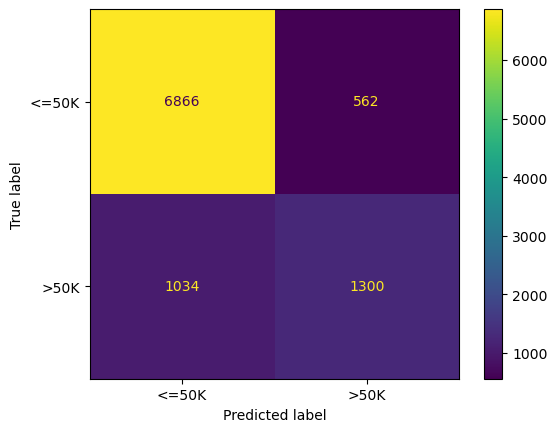

In [39]:
y_pred_grid_knn = grid_knn.predict(scaled_X_test)
model_report(grid_knn, y_pred_grid_knn)

### <a id='Random_Forest_Classifier_with_GridSearch_(grid_rfc)' href=#1> Random Forest Classifier with GridSearch (grid_rfc) </a>

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
n_estimators = [64, 100, 128, 200]
max_features = ["sqrt", "log2", None]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfc = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}

grid_rfc = GridSearchCV(rfc, param_grid_rfc)
grid_rfc.fit(scaled_X_train, y_train)
grid_rfc.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'n_estimators': 64,
 'oob_score': True}

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      7428
        >50K       0.72      0.63      0.67      2334

    accuracy                           0.85      9762
   macro avg       0.80      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762



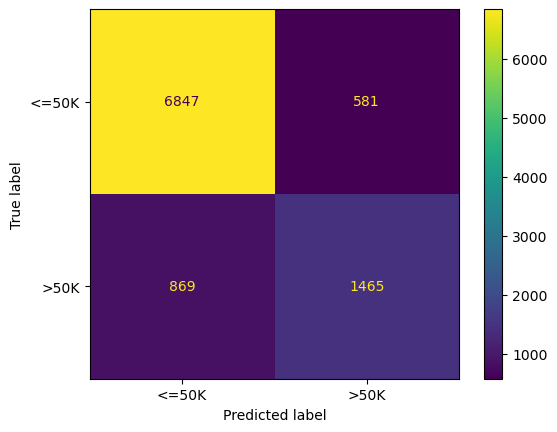

In [41]:
y_pred_grid_rfc = grid_rfc.predict(scaled_X_test)
model_report(grid_rfc, y_pred_grid_rfc)

### <a id='SVC_with_GridSearch_(grid_svc)_&_LinearSVC_with_GridSearch_(grid_lsvc)' href=#1> SVC with GridSearch (grid_svc) & LinearSVC with GridSearch (grid_lsvc) </a>

In [42]:
from sklearn.svm import SVC

svc = SVC()
C = [10, 100]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
degree = [1, 2]
param_grid_svc = {'C': C, 'kernel': kernel, 'gamma': gamma, 'degree': degree}

grid_svc = GridSearchCV(svc, param_grid_svc)
grid_svc.fit(scaled_X_train, y_train)
grid_svc.best_params_

{'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7428
        >50K       0.76      0.59      0.67      2334

    accuracy                           0.86      9762
   macro avg       0.82      0.77      0.79      9762
weighted avg       0.85      0.86      0.85      9762



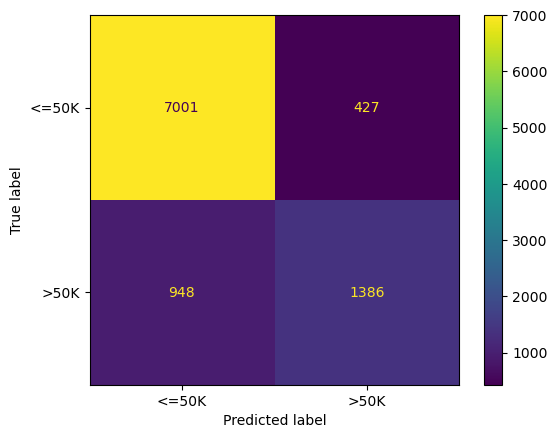

In [43]:
y_pred_grid_svc = grid_svc.predict(scaled_X_test)
model_report(grid_svc, y_pred_grid_svc)

As degree = 1 with a linear kernel produces the best performance for the SVC model through hyperparameter tuning, LinearSVC will be used instead as it runs much faster.

In [44]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
C = [0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
loss = ['hinge', 'squared_hinge']
class_weight = ['balanced', None]
param_grid_lsvc = {'C': C, 'penalty': penalty, 'loss': loss, 'class_weight': class_weight}

grid_lsvc = GridSearchCV(lsvc, param_grid_lsvc)
grid_lsvc.fit(scaled_X_train, y_train)
grid_lsvc.best_params_

{'C': 0.01, 'class_weight': None, 'loss': 'squared_hinge', 'penalty': 'l2'}

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7428
        >50K       0.75      0.60      0.67      2334

    accuracy                           0.86      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.86      0.85      9762



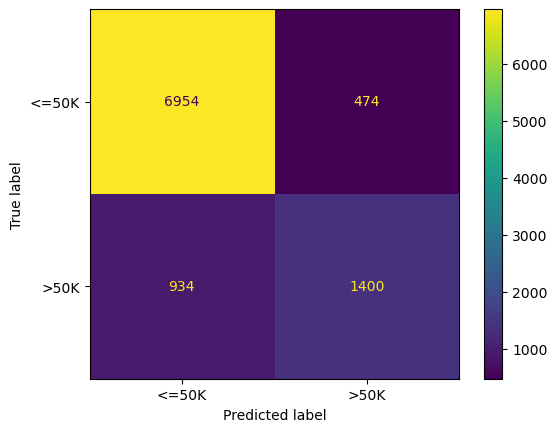

In [45]:
y_pred_grid_lsvc = grid_lsvc.predict(scaled_X_test)
model_report(grid_lsvc, y_pred_grid_lsvc)

Comparing with the original SVC model, the performance is almost identical, and the algorithm runs way faster.

### <a id='AdaBoost_with_GridSearch_(grid_ab)' href=#1> AdaBoost with GridSearch (grid_ab) </a>

In [46]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
n_estimators = [50, 100, 200, 300]
learning_rate = [0.01, 0.1, 0.5, 1.0]
param_grid_ab = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

grid_ab = GridSearchCV(ab, param_grid_ab)
grid_ab.fit(scaled_X_train, y_train)
grid_ab.best_params_

{'learning_rate': 1.0, 'n_estimators': 300}

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7428
        >50K       0.78      0.66      0.71      2334

    accuracy                           0.87      9762
   macro avg       0.84      0.80      0.82      9762
weighted avg       0.87      0.87      0.87      9762



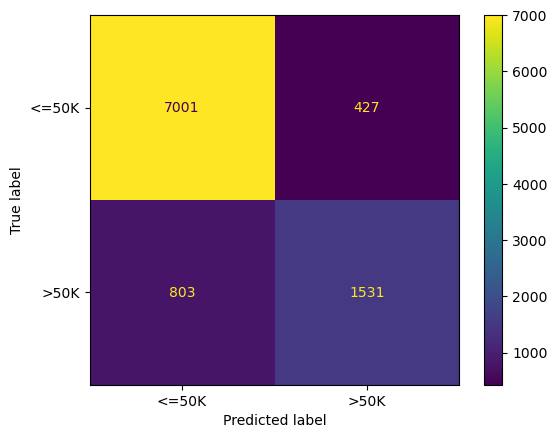

In [47]:
y_pred_grid_ab = grid_ab.predict(scaled_X_test)
model_report(grid_ab, y_pred_grid_ab)

### <a id='Extreme_Gradient_Boost_with_GridSearch_(grid_xgb)' href=#1> Extreme Gradient Boost with GridSearch (grid_xgb) </a>

In [48]:
from xgboost import XGBClassifier

# encode to numeric for XGB
y_train_enc = y_train.map({'<=50K': 0, '>50K': 1})

xgb = XGBClassifier()
learning_rate = [0.01, 0.1, 0.2]
n_estimators = [50, 100, 200]
max_depth = [3, 5, 7]
min_child_weight = [1, 3, 5]
subsample = [0.8, 0.9, 1.0]
colsample_bytree = [0.8, 0.9, 1.0]
param_grid_xgb = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth, 'min_child_weight': min_child_weight, 'subsample': subsample, 'colsample_bytree': colsample_bytree}

grid_xgb = GridSearchCV(xgb, param_grid_xgb)
grid_xgb.fit(scaled_X_train, y_train_enc)
grid_xgb.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 200,
 'subsample': 1.0}

              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92      7428
        >50K       0.80      0.65      0.72      2334

    accuracy                           0.88      9762
   macro avg       0.85      0.80      0.82      9762
weighted avg       0.87      0.88      0.87      9762



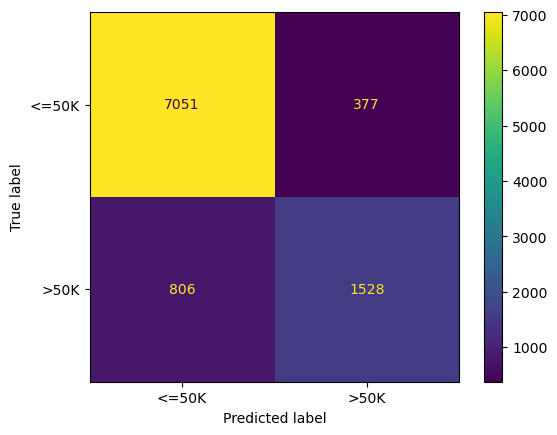

In [49]:
y_pred_grid_xgb = grid_xgb.predict(scaled_X_test)

# invert encode to category label
invert_enc_dict = {0: '<=50K', 1: '>50K'}
y_pred_grid_xgb = np.array([invert_enc_dict[val] for val in y_pred_grid_xgb])

# insert optional_array_class for model_report function
model_report(grid_xgb, y_pred_grid_xgb, optional_array_classes = np.array(['<=50K', '>50K'], dtype = object))

### <a id='Gaussian_NB_(gnb)' href=#1> Gaussian NB (gnb) </a>

In [50]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(scaled_X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      7428
        >50K       0.31      0.96      0.47      2334

    accuracy                           0.47      9762
   macro avg       0.64      0.64      0.47      9762
weighted avg       0.81      0.47      0.48      9762



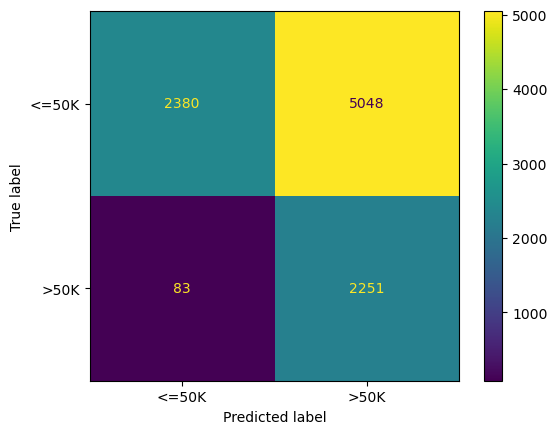

In [51]:
y_pred_gnb = gnb.predict(scaled_X_test)
model_report(gnb, y_pred_gnb)

## <a id='Model_Comparison' href=#1> Model Comparison </a>

Comparison of error and R^2 scores for different algorithms.
- Accuracy: Ratio of correct prediction count by total predictions made.
- Precision: Ratio of TP count to total TP count made by model.
- Recall: Ratio of TP count to total actual positive count.
- F1-Score: Sensitive to low values, will only be high when precision and recall is high.

In [52]:
index = ['grid_log', 'grid_knn', 'grid_rfc', 'grid_svc', 'grid_lsvc', 'grid_ab', 'grid_xgb', 'gnb']
df_error_compare = error_compare_classification_binary(index) # self defined function
df_error_compare

,Accuracy Score (higher better),F1-Score [<=50K] (closer to 1 better),F1-Score [>50K] (closer to 1 better)
grid_log,0.855767,0.907757,0.669484
grid_knn,0.836509,0.895877,0.619638
grid_rfc,0.851465,0.904253,0.668950
grid_svc,0.859148,0.910581,0.668435
grid_lsvc,0.855767,0.908070,0.665399
grid_ab,0.874001,0.919249,0.713420
grid_xgb,0.878816,0.922604,0.720925
gnb,0.474390,0.481246,0.467352


Sorting the dataframe to view the best model for each categories:

In [53]:
print('Sorted by best Accuracy Score:')
df_error_compare.sort_values('Accuracy Score (higher better)', ascending = False)

Sorted by best Accuracy Score:


,Accuracy Score (higher better),F1-Score [<=50K] (closer to 1 better),F1-Score [>50K] (closer to 1 better)
grid_xgb,0.878816,0.922604,0.720925
grid_ab,0.874001,0.919249,0.713420
grid_svc,0.859148,0.910581,0.668435
grid_log,0.855767,0.907757,0.669484
grid_lsvc,0.855767,0.908070,0.665399
grid_rfc,0.851465,0.904253,0.668950
grid_knn,0.836509,0.895877,0.619638
gnb,0.474390,0.481246,0.467352


In [54]:
print('Sorted by best F1-Score [<=50K]:')
df_error_compare.sort_values('F1-Score [<=50K] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [<=50K]:


,Accuracy Score (higher better),F1-Score [<=50K] (closer to 1 better),F1-Score [>50K] (closer to 1 better)
grid_xgb,0.878816,0.922604,0.720925
grid_ab,0.874001,0.919249,0.713420
grid_svc,0.859148,0.910581,0.668435
grid_lsvc,0.855767,0.908070,0.665399
grid_log,0.855767,0.907757,0.669484
grid_rfc,0.851465,0.904253,0.668950
grid_knn,0.836509,0.895877,0.619638
gnb,0.474390,0.481246,0.467352


In [55]:
print('Sorted by best F1-Score [>50K]:')
df_error_compare.sort_values('F1-Score [>50K] (closer to 1 better)', ascending = False)

Sorted by best F1-Score [>50K]:


,Accuracy Score (higher better),F1-Score [<=50K] (closer to 1 better),F1-Score [>50K] (closer to 1 better)
grid_xgb,0.878816,0.922604,0.720925
grid_ab,0.874001,0.919249,0.713420
grid_log,0.855767,0.907757,0.669484
grid_rfc,0.851465,0.904253,0.668950
grid_svc,0.859148,0.910581,0.668435
grid_lsvc,0.855767,0.908070,0.665399
grid_knn,0.836509,0.895877,0.619638
gnb,0.474390,0.481246,0.467352


Observation:
1. **grid_xgb has the highest accuracy and F1-scores.** Meaning it is the most accurate in predicting the labels of the dataset, with an accuracy score of ? and F1-scores of ? and ? for '<=50K' and '>50K'.
2. grid_ab is a close 2nd with an accuracy and F1-scores of ?, ? and ?.
3. grid_svc, grid_lsvc and grid_log have very similar accuracy scores between ? and ? with F1-scores only seperated by ? and ?.
4. By looking at the rankings of the algorithms, we can deduce that this dataset has a complex relationship that has some non-linear aspects. It is not well-separated or linearly separable and does not exhibit strong local patterns.

## <a id='Conclusion' href=#1> Conclusion </a>

Based on the results of this project, we can conclude that:
1. Through EDA, we identified that the **marital status is a huge indicator in dictating the annual income** of an individual. It is more likely that someone who is married to earn above \\$50K annually rather than an individual who has never married. The reasoning might be that most individuals who proceed with marriage only do so when they are finantially stable. Besides, most married couples have worked a number of years. Therefore, their income would be higher than non-married youngsters.
2. The **age, working hours per week, capital gain and gender** also affects the annual income, although the impact is slightly lesser. The probability to earn above \\$50K is highest at the age of 40, while working 40 hours and above per week. Individual who has capital gains would have a high annual income due to high earnings from their asset management. Meanwhile, the percentage of males attaining an above \\$50K income is higher than females.
3. Being **self employed gives you the highest chance to earn above \\$50K annually.** However, your **education level must be high** enough to be a high earning self employed individual.
4. The **best model is the Extreme Gradient Boost (grid_xgb) model** as it is the most accurate model. It has an **accuracy score of ? and F1-scores of ? and ? for '<=50K' and '>50K'.**

## <a id='Recommendation' href=#1> Recommendation </a>

From the conclusions made, I will recommend that:
1. Being **self employed** gives you the highest chance to be a high earner.
2. To be earning above \\$50K annually, your education level should be higher than high school in order to learn valuable knowledge and skills which you could utilize in your business or job. The best case would be a **Masters, Doctorate or Prof-School graduate**.
3. The top jobs which are well paid are **executive/managerial positions, sales, professionals and specialists.**
4. Before going self employed, it is advisable to **work as an employee for a number of years** before proceeding to be self employed as the experience gained from previous works will be invaluable for the future.
5. You must be prepared to **work longer than regular employees** as your earnings will be based on your own hard work.

## <a id='Final_Model_Deployment' href=#1> Final Model Deployment </a>

Create the final model with the best hyperparameters and fit the model with whole dataset.

In [56]:
# Create best model:
final_model_xgb = XGBClassifier(learning_rate = 0.1, n_estimators = 200, max_depth = 5, min_child_weight = 3, subsample = 1.0, colsample_bytree = 0.9)
scaled_X = scaler.transform(X)
y_enc = y.map({'<=50K': 0, '>50K': 1}) # encode to numeric for XGB
final_model_xgb.fit(scaled_X, y_enc)

# Create a pipeline which fitted scaler and model:
from sklearn.pipeline import Pipeline
final_pipeline = Pipeline([('scaler', scaler), ('model', final_model_xgb)])

# Save model:
import joblib
joblib.dump(final_pipeline, 'income_evaluation_model_pipeline.pkl')
joblib.dump(list(X.columns), 'income_evaluation_col_names.pkl')
joblib.dump(list(new_column[:-1]), 'income_evaluation_ori_X_col_names.pkl')

# To load model:
# import joblib
# loaded_model = joblib.load('income_evaluation_model_pipeline.pkl')
# dummy_columns = joblib.load('income_evaluation_col_names.pkl')
# ori_columns = joblib.load('income_evaluation_ori_X_col_names.pkl')

# To use model:
# import pandas as pd
# # For 1 list, new_list_data = [['values']]:
# new_list_data = [[]]
# new_data = pd.get_dummies(pd.DataFrame(new_list_data, columns = ori_columns)).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data) # Output: 0 = '<=50K', 1 = '>50K'
# # # # # # # # # # # # # # # # # # # # # # 
# # For new df, df_new = pd read file:
# df_new = pd.read_excel('example.xlsx').rename(columns = lambda x: x.strip()).applymap(lambda x: x.strip() if isinstance(x, str) else x).replace('?', 'Other')
# new_data = pd.get_dummies(df_new).reindex(columns = dummy_columns, fill_value = 0)
# loaded_model.predict(new_data) # Output: 0 = '<=50K', 1 = '>50K'

['income_evaluation_col_names.pkl']